In [56]:
%matplotlib inline

import vtovosm as vtv
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

plt.rcParams["figure.figsize"] = (12,9)

densities = [10,20,30,40,50,60,70,80,120,160]
results_all = vtv.utils.load('results/viriyasitavat_comparison/result_analysis.pickle.xz')
count_veh = 337 # from [48, 96, 145, 193, 241, 289, 337, 386, 578, 771]

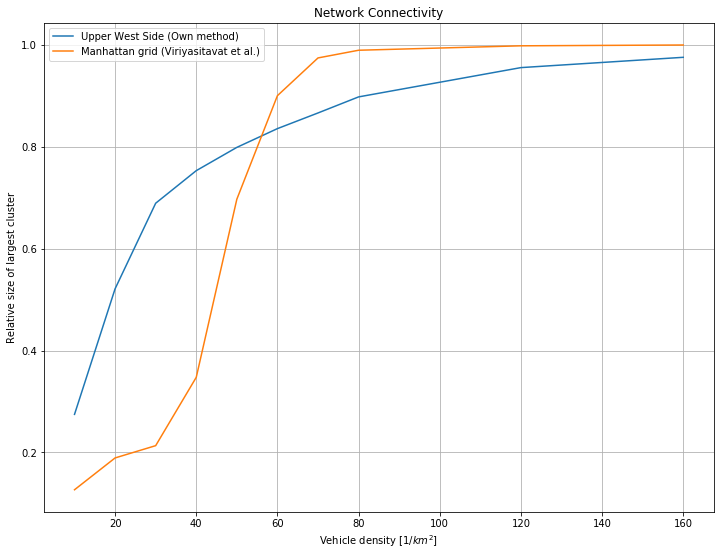

In [36]:
mean_net_connectivities = np.array([(density, np.mean(result['net_connectivities'])) for density, result in sorted(results_all.items())])
mean_net_connectivities_paper = np.array([12.67, 18.92, 21.33, 34.75, 69.72, 90.05, 97.46, 98.97, 99.84, 100]) / 100
    
plt.plot(densities, mean_net_connectivities[:,1], label='Upper West Side (Own method)')
plt.plot(densities, mean_net_connectivities_paper, label='Manhattan grid (Viriyasitavat et al.)')

plt.grid(True)
plt.xlabel(r'Vehicle density $[1/km^2]$')
plt.ylabel('Relative size of largest cluster')
plt.title('Network Connectivity')
plt.legend()

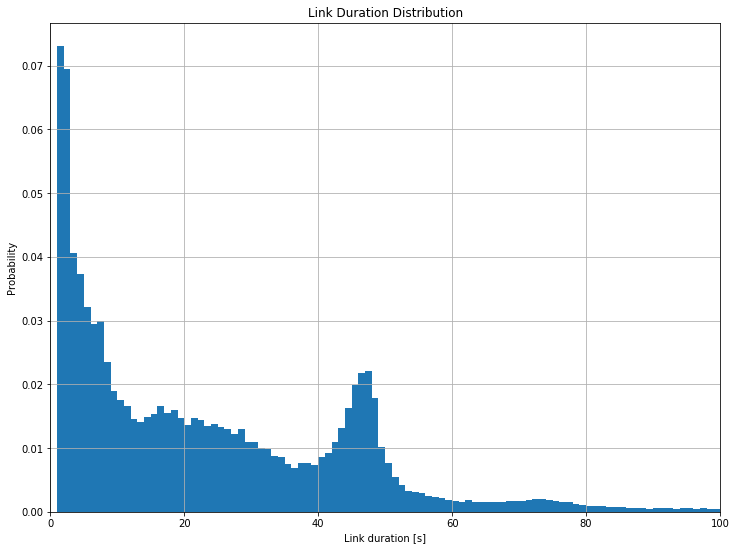

In [37]:
link_durations = results_all[count_veh]['link_durations']

bins = int(max(link_durations) - min(link_durations))
hist = plt.hist(link_durations, bins=bins, normed=True)
plt.xlim((0,100))
plt.grid(True)
plt.xlabel('Link duration [s]')
plt.ylabel('Probability')
plt.title('Link Duration Distribution')

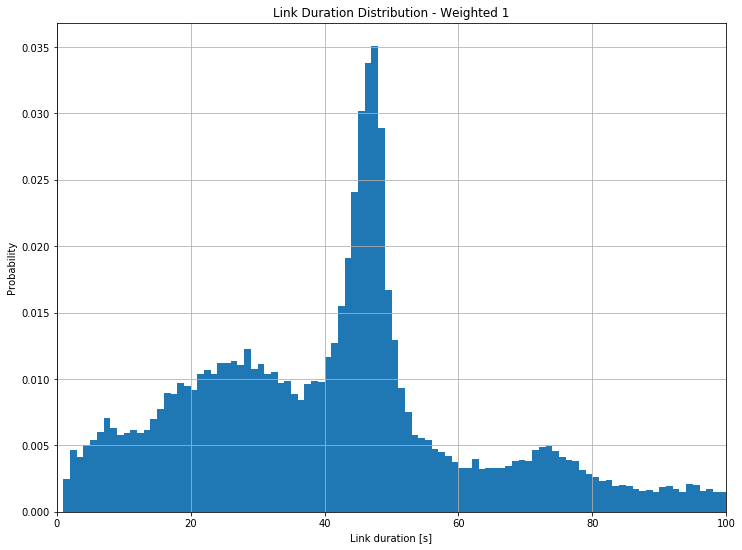

In [38]:
bins = int(max(link_durations) - min(link_durations))
hist = plt.hist(link_durations, bins=bins, normed=True, weights=link_durations)
plt.xlim((0,100))
plt.grid(True)
plt.xlabel('Link duration [s]')
plt.ylabel('Probability')
plt.title('Link Duration Distribution - Weighted 1')

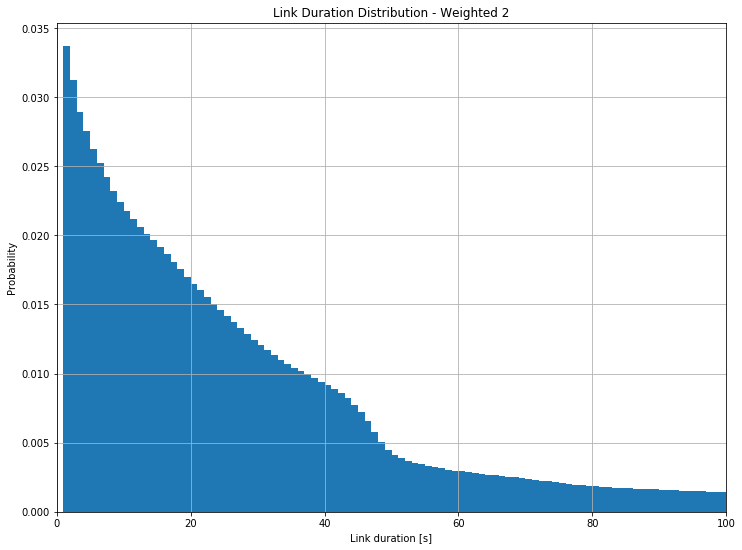

In [39]:
link_durations_w = np.zeros(sum(link_durations))
idx = 0
for duration in link_durations:
    link_durations_w[idx:idx+duration] = 1+np.arange(duration)
    idx += duration
    
bins = int(max(link_durations_w) - min(link_durations_w))
hist = plt.hist(link_durations_w, bins=bins, normed=True)
plt.xlim((0,100))
plt.grid(True)
plt.xlabel('Link duration [s]')
plt.ylabel('Probability')
plt.title('Link Duration Distribution - Weighted 2')

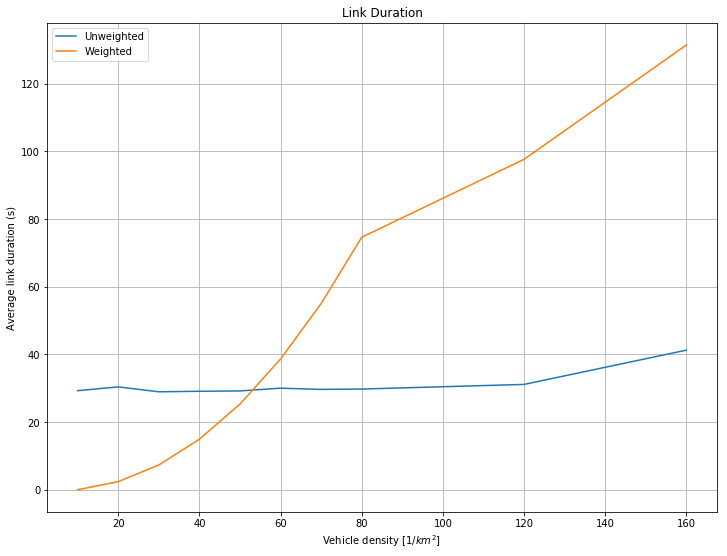

In [54]:
mean_link_durations = np.array([(density, np.mean(result['link_durations'])) for density, result in sorted(results_all.items())])

mean_link_durations_w = np.zeros([len(results_all), 2])
for idx, (density, result) in enumerate(sorted(results_all.items())):
    link_durations = result['link_durations']
    link_durations_w = np.zeros(sum(link_durations))
    idx_w = 0
    for duration in link_durations:
        link_durations_w[idx_w:idx_w+duration] = 1+np.arange(duration)
        idx_w += duration
    mean_link_durations_w[idx, :] = (density, np.mean(mean_link_durations_w))


plt.plot(densities, mean_link_durations[:,1], label='Unweighted')
plt.plot(densities, mean_link_durations_w[:,1], label='Weighted')
plt.grid(True)
plt.xlabel(r'Vehicle density $[1/km^2]$')
plt.ylabel('Average link duration (s)')
plt.title('Link Duration')
plt.legend()

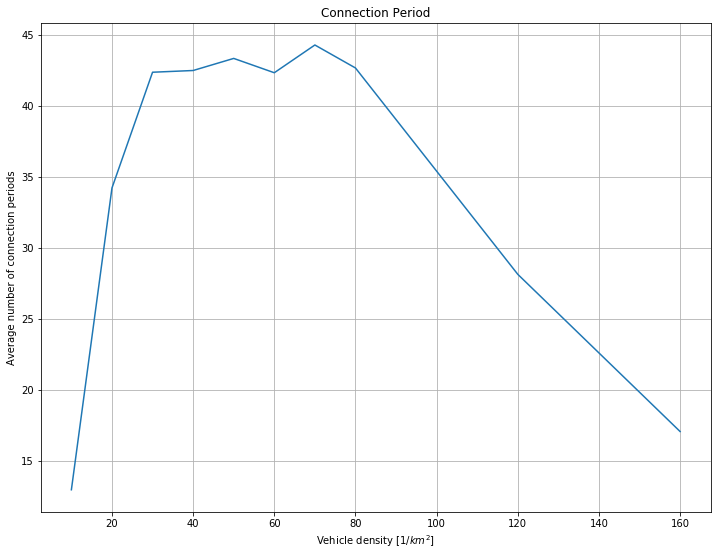

In [41]:
mean_con_periods = np.array([(density, result['connection_periods_mean']) for density, result in sorted(results_all.items())])

plt.plot(densities, mean_con_periods[:,1])
plt.grid(True)
plt.xlabel(r'Vehicle density $[1/km^2]$')
plt.ylabel('Average number of connection periods')
plt.title('Connection Periods')

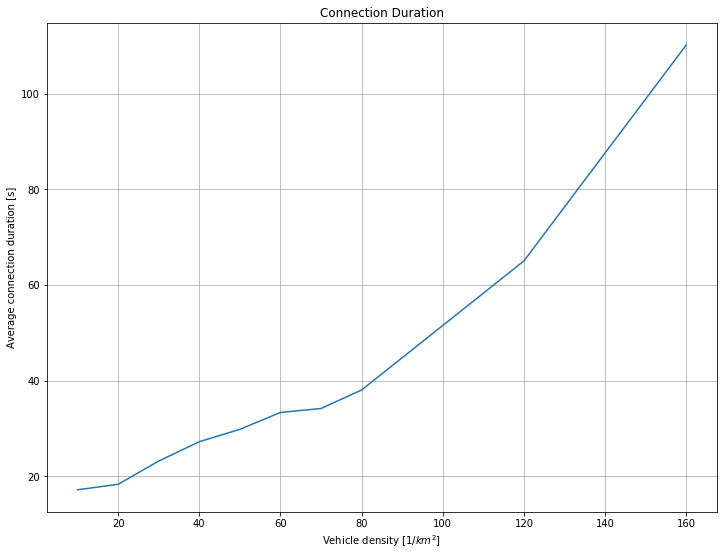

In [42]:
mean_con_durations = np.array([(density, result['connection_duration_mean']) for density, result in sorted(results_all.items())])

plt.plot(densities, mean_con_durations[:,1])
plt.grid(True)
plt.xlabel(r'Vehicle density $[1/km^2]$')
plt.ylabel('Average connection duration [s]')
plt.title('Connection Duration')

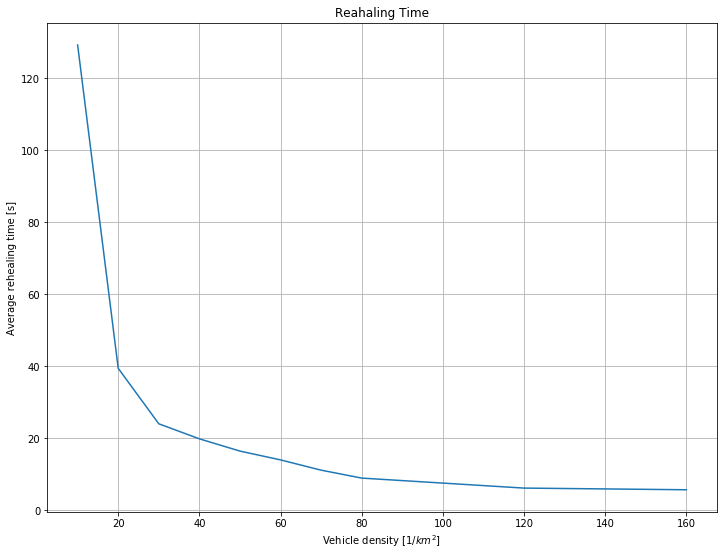

In [43]:
mean_rehaling_times = np.array([(density, np.mean(result['rehealing_times'])) for density, result in sorted(results_all.items())])

plt.plot(densities, mean_rehaling_times[:,1])
plt.grid(True)
plt.xlabel(r'Vehicle density $[1/km^2]$')
plt.ylabel('Average rehealing time [s]')
plt.title('Reahaling Time')

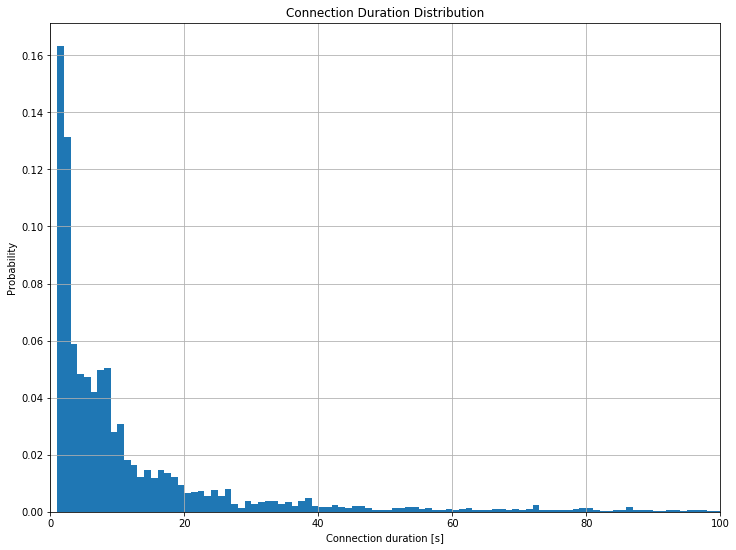

In [44]:
con_durations = results_all[count_veh]['connection_durations']

bins = int(max(con_durations) - min(con_durations))
hist = plt.hist(con_durations, bins=bins, normed=True)
plt.xlim((0,100))
plt.grid(True)
plt.xlabel('Connection duration [s]')
plt.ylabel('Probability')
plt.title('Connection Duration Distribution')

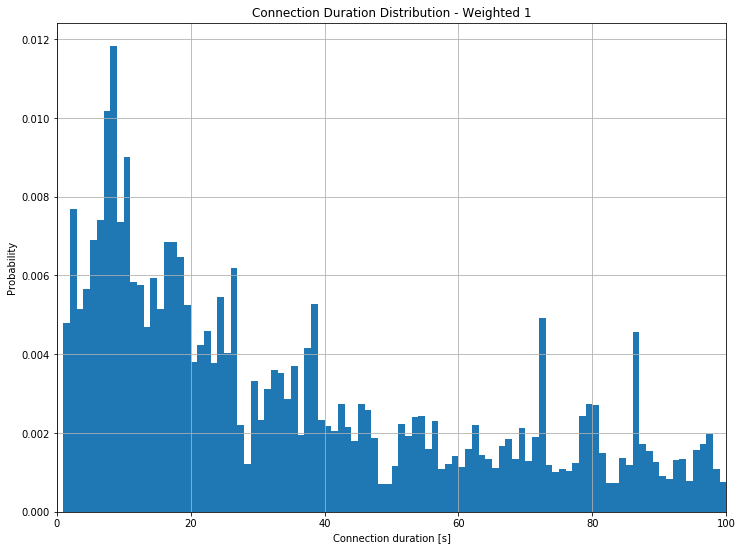

In [45]:
bins = int(max(con_durations) - min(con_durations))
hist = plt.hist(con_durations, bins=bins, normed=True, weights=con_durations)
plt.xlim((0,100))
plt.grid(True)
plt.xlabel('Connection duration [s]')
plt.ylabel('Probability')
plt.title('Connection Duration Distribution - Weighted 1')

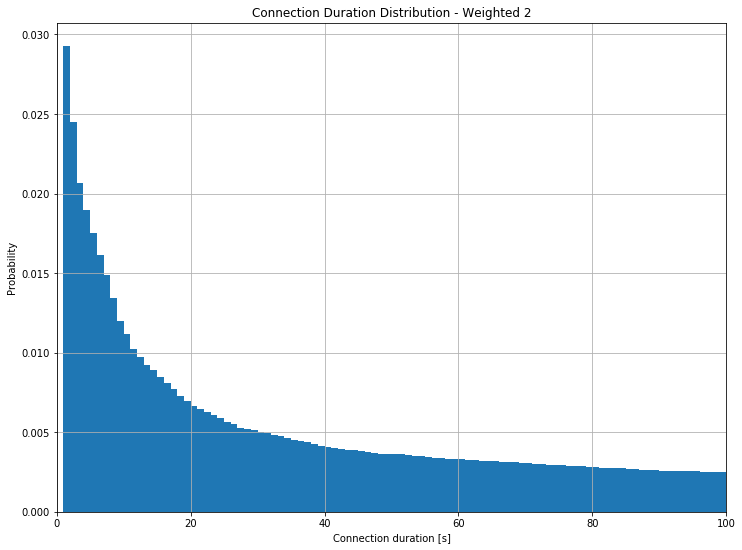

In [46]:
con_durations_w = np.zeros(sum(con_durations))
idx = 0
for duration in con_durations:
    con_durations_w[idx:idx+duration] = 1+np.arange(duration)
    idx += duration
    
bins = int(max(con_durations_w) - min(con_durations_w))
hist = plt.hist(con_durations_w, bins=bins, normed=True)
plt.xlim((0,100))
plt.grid(True)
plt.xlabel('Connection duration [s]')
plt.ylabel('Probability')
plt.title('Connection Duration Distribution - Weighted 2')